# TensorFlow2教程-Keras函数式API



函数API是一种创建模型的方式，该方法比Sequential以下方法更加灵活：它可以处理具有非线性拓扑的模型，具有共享层的模型以及具有多个输入或输出的模型。

它基于以下思想：深度学习模型通常是层的有向无环图（DAG）。Functional API是一组用于构建层图的工具。


In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
tf.keras.backend.clear_session()


# 1 构建简单的网络

1.1 创建网络

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


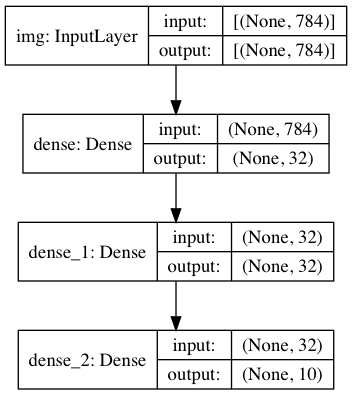

In [3]:
inputs = tf.keras.Input(shape=(784,),name='img')
# 以上一层的输出作为下一层的输入
h1=layers.Dense(32,activation='relu')(inputs)
h2 = layers.Dense(32,activation='relu')(h1)
outputs = layers.Dense(10,activation='softmax')(h2)
model = tf.keras.Model(inputs=inputs,outputs=outputs,name='mnist_model')
model.summary()
keras.utils.plot_model(model, 'mnist_model.png')
keras.utils.plot_model(model, 'model_info.png', show_shapes=True)

“层图”是用于深度学习模型的非常直观的结构图，而函数式API是构建结构图对应模型的方法。

## 1.2 训练、验证及测试

In [4]:
# 模型的训练、验证和测试与训练模型完全相同
# 下面使用mnist数据集进行展示
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [7]:
x_train=x_train.reshape(60000,784).astype('float32')/255
x_test = x_test.reshape(10000, 784).astype('float32') /255
model.compile(optimizer=keras.optimizers.RMSprop(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=64,epochs=5,validation_split=0.2)
test_score=model.evaluate(x_test,y_test,verbose=0)
print('test loss:',test_score[0])
print('test acc:', test_score[1])

Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 0.7239 - accuracy: 0.7932 - val_loss: 0.2270 - val_accuracy: 0.9347
Epoch 2/5
750/750 [==============================] - 1s 1ms/step - loss: 0.2227 - accuracy: 0.9354 - val_loss: 0.1808 - val_accuracy: 0.9486
Epoch 3/5
750/750 [==============================] - 1s 1ms/step - loss: 0.1676 - accuracy: 0.9504 - val_loss: 0.1499 - val_accuracy: 0.9582
Epoch 4/5
750/750 [==============================] - 1s 1ms/step - loss: 0.1347 - accuracy: 0.9607 - val_loss: 0.1391 - val_accuracy: 0.9597
Epoch 5/5
750/750 [==============================] - 1s 1ms/step - loss: 0.1211 - accuracy: 0.9647 - val_loss: 0.1400 - val_accuracy: 0.9608
test loss: 0.13248351216316223
test acc: 0.9611999988555908


## 1.3 模型保存和序列化

In [8]:
# 模型的保存与序列化与Sequential模型完全一样
model.save('model_save.h5')
del model 
model =keras.models.load_model('model_save.h5')

# 2 使用共享网络创建多个模型

在函数式API中，通过在图层网络中指定其输入和输出来创建模型。 这意味着可以使用单个图层图来生成多个模型。

In [10]:
# 自编码器网络结构
# 编码器
encode_input=keras.Input(shape=(28,28,1),name='img')
h1=layers.Conv2D(16,3,activation='relu')(encode_input)
h1 = layers.Conv2D(32, 3, activation='relu')(h1)
h1 = layers.MaxPool2D(3)(h1)
h1 = layers.Conv2D(32, 3, activation='relu')(h1)
h1 = layers.Conv2D(16, 3, activation='relu')(h1)
encode_output = layers.GlobalMaxPool2D()(h1)
encode_model = keras.Model(inputs=encode_input,outputs=encode_output,name='encoder')
encode_model.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

In [11]:
# 解码器
h2 = layers.Reshape((4,4,1))(encode_output)
h2 = layers.Conv2DTranspose(16, 3, activation='relu')(h2)
h2 = layers.Conv2DTranspose(32, 3, activation='relu')(h2)
h2 = layers.UpSampling2D(3)(h2)
h2 = layers.Conv2DTranspose(16, 3, activation='relu')(h2)
decode_output = layers.Conv2DTranspose(1, 3, activation='relu')(h2)
autoencoder = keras.Model(inputs=encode_input, outputs=decode_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                

请注意，我们使解码架构与编码架构严格对称，因此我们得到的输出形状与输入形状相同(28, 28, 1)。Conv2D一层的反面是Conv2DTranspose一层，MaxPooling2D一层的反面是UpSampling2D一层。

可以把整个模型，当作一层网络使用 我们可以通过在另一层的Input或Output上调用任何模型，将其视为层。请注意，通过调用模型，我们不仅可以重用模型的体系结构，还可以重用其权重。

下面是对自动编码器示例的另一种处理方式，该示例创建一个编码器模型，一个解码器模型，并将它们链接到两个调用中以获得自编码器模型：



In [12]:
encode_input = keras.Input(shape=(28,28,1), name='src_img')
h1 = layers.Conv2D(16, 3, activation='relu')(encode_input)
h1 = layers.Conv2D(32, 3, activation='relu')(h1)
h1 = layers.MaxPool2D(3)(h1)
h1 = layers.Conv2D(32, 3, activation='relu')(h1)
h1 = layers.Conv2D(16, 3, activation='relu')(h1)
encode_output = layers.GlobalMaxPool2D()(h1)

encode_model = keras.Model(inputs=encode_input, outputs=encode_output, name='encoder')
encode_model.summary()

decode_input = keras.Input(shape=(16,), name='encoded_img')
h2 = layers.Reshape((4, 4, 1))(decode_input)
h2 = layers.Conv2DTranspose(16, 3, activation='relu')(h2)
h2 = layers.Conv2DTranspose(32, 3, activation='relu')(h2)
h2 = layers.UpSampling2D(3)(h2)
h2 = layers.Conv2DTranspose(16, 3, activation='relu')(h2)
decode_output = layers.Conv2DTranspose(1, 3, activation='relu')(h2)
decode_model = keras.Model(inputs=decode_input, outputs=decode_output, name='decoder')
decode_model.summary()

autoencoder_input = keras.Input(shape=(28,28,1), name='img')
h3 = encode_model(autoencoder_input)
autoencoder_output = decode_model(h3)
autoencoder = keras.Model(inputs=autoencoder_input, outputs=autoencoder_output,
                          name='autoencoder')
autoencoder.summary()


Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
src_img (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 16)                0   

模型可以嵌套：模型可以包含子模型（因为模型就像一层一样）。

### 模型集成

模型嵌套的另一种常见模式是集成。以下是将一组模型整合为一个平均其预测值的模型的方法：

In [14]:
def get_model():
    inputs=keras.Input(shape=(128,))
    outputs=keras.layers.Dense(1,activation='sigmoid')(inputs)
    return keras.Model(inputs,outputs)
model1 =get_model()
model2 =get_model()
model3= get_model()
inputs = keras.Input(shape=(128,))
y1=model1(inputs)
y2 = model2(inputs)
y3 =model3(inputs)
outputs=layers.average([y1,y2,y3])
ensemble_model = keras.Model(inputs, outputs)


# 3 复杂网络结构构建


## 3.1 多输入与多输出网络

假设我们正在建立一个系统，用于按优先级对定制票进行排序并将其分配到正确的部门。

模型将具有3个输入：

+ 票证标题（文本输入）
+ 票证的文本正文（文本输入）
+ 用户添加的所有标签（分类输入） 它将有两个输出：
+ 优先级得分，介于0和1之间（标量S型输出）
+ 应该处理票证的部门（softmax输出） 仅使用几行Functional API构建该模型。


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 64)     128000      title[0][0]                      
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 64)     128000      body[0][0]                       
____________________________________________________________________________________________

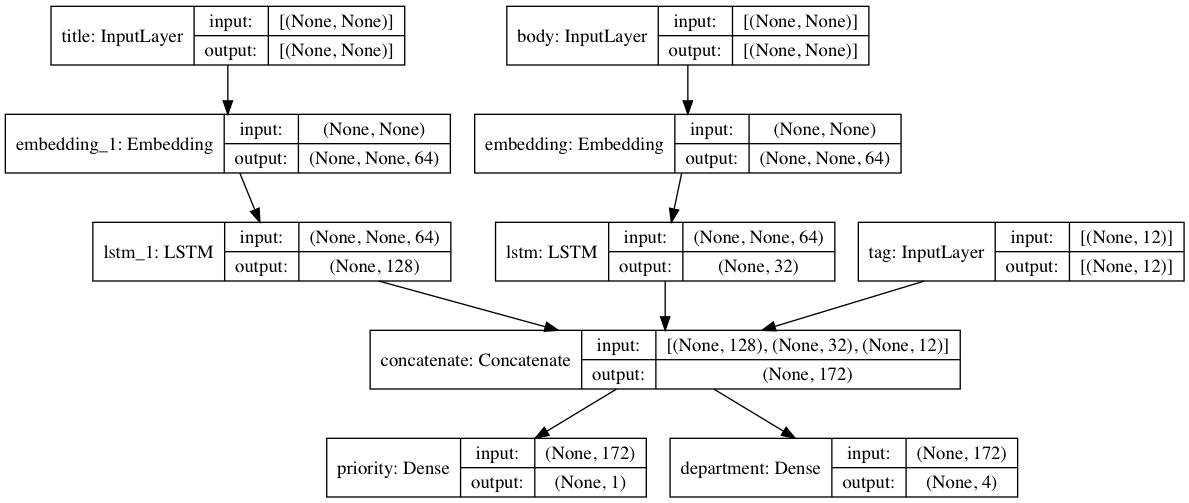

In [15]:
# 构建一个根据定制票标题、内容和标签，预测票证优先级和执行部门的网络
# 超参
num_words=2000
num_tags=12
num_departments=4

# 输入
body_input=keras.Input(shape=(None,),name='body')
title_input =keras.Input(shape=(None,),name='title')
tag_input=keras.Input(shape=(num_tags,),name='tag')

# 嵌入层
body_feat=layers.Embedding(num_words,64)(body_input)
title_feat=layers.Embedding(num_words,64)(title_input)

# 特征提取层
body_feat=layers.LSTM(32)(body_feat)
title_feat=layers.LSTM(128)(title_feat)
features= layers.concatenate([title_feat,body_feat,tag_input])

# 分类层
priority_pred = layers.Dense(1,activation='sigmoid',name='priority')(features)
department_pred = layers.Dense(num_departments,activation='softmax',name='department')(features)

# 构建模型
model=keras.Model(inputs=[body_input,title_input,tag_input],outputs=[priority_pred,department_pred])
model.summary()
keras.utils.plot_model(model,'multi_model.png', show_shapes=True)

编译此模型时，我们可以为每个输出分配不同的loss。甚至可以为每个loss分配不同的权重，以调整它们对总训练loss的贡献。



In [16]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss={'priority': 'binary_crossentropy',
                  'department': 'categorical_crossentropy'},
             loss_weights=[1., 0.2])

In [17]:
# 构造数据并训练
import numpy as np
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tag_data = np.random.randint(2, size=(1280, num_tags)).astype('float32')
# 标签
priority_label = np.random.random(size=(1280, 1))
department_label = np.random.randint(2, size=(1280, num_departments))
# 训练
history = model.fit({'title':title_data,'body':body_data,'tag':tag_data},
                   {'priority':priority_label,'department':department_label},
                   batch_size=32,
                   epochs=5)

Epoch 1/5
40/40 [==============================] - 4s 26ms/step - loss: 1.2837 - priority_loss: 0.7106 - department_loss: 2.8656
Epoch 2/5
40/40 [==============================] - 1s 26ms/step - loss: 1.3023 - priority_loss: 0.7007 - department_loss: 3.0077
Epoch 3/5
40/40 [==============================] - 1s 25ms/step - loss: 1.2834 - priority_loss: 0.6977 - department_loss: 2.9284
Epoch 4/5
40/40 [==============================] - 1s 24ms/step - loss: 1.2643 - priority_loss: 0.6980 - department_loss: 2.8317
Epoch 5/5
40/40 [==============================] - 1s 24ms/step - loss: 1.2710 - priority_loss: 0.6985 - department_loss: 2.8627


## 3.2 小型残差网络

Functional API还可以使操作非线性连接拓扑变得容易，也就是说，模型中的层不是顺序连接。

常见的用例是残余连接。

下面，我们为CIFAR10建立一个玩具ResNet模型来演示这一点。

Functional API还可以使操作非线性连接拓扑变得容易，也就是说，模型中的层不是顺序连接。

常见的用例是残余连接。

下面，我们为CIFAR10建立一个玩具ResNet模型来演示这一点。

Model: "small_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_12[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_13[0][0]                  
_______________________________________________________________________________________

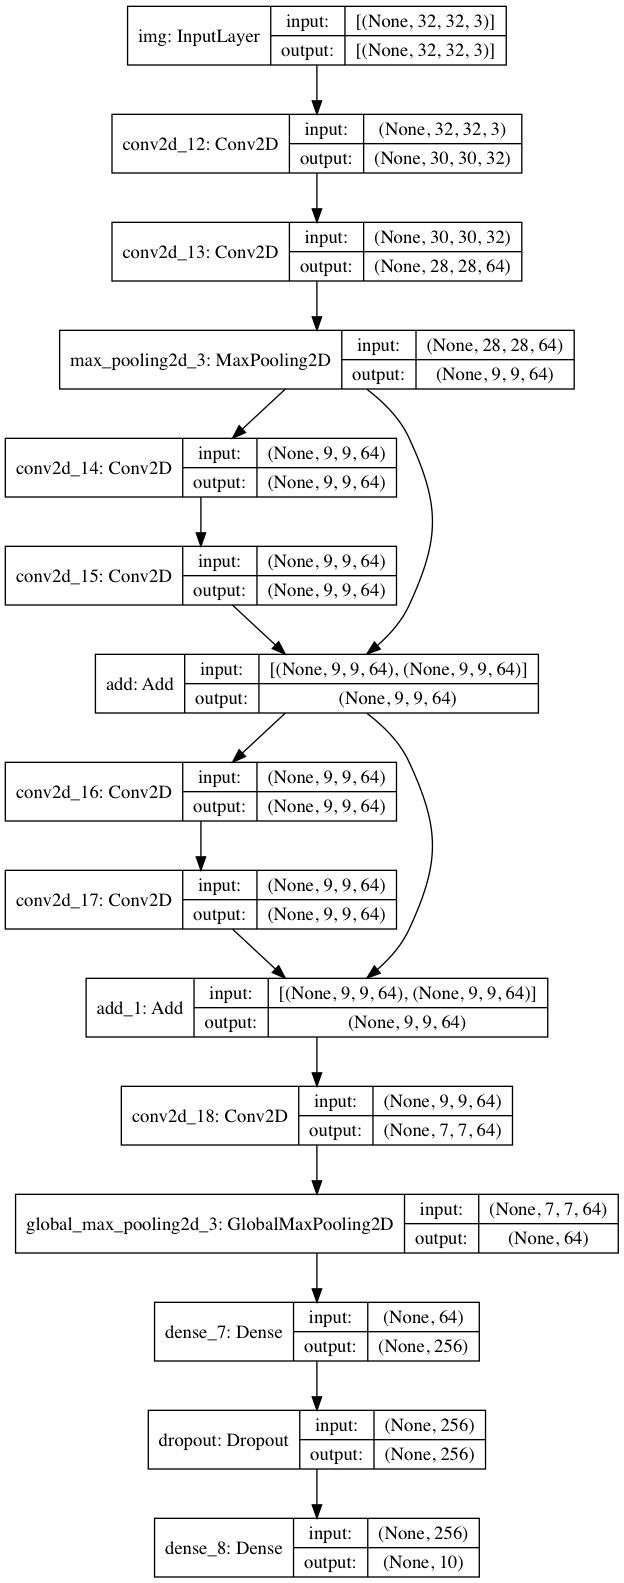

In [18]:
inputs = keras.Input(shape=(32,32,3),name='img')
h1 = layers.Conv2D(32,3,activation='relu')(inputs)
h1 = layers.Conv2D(64,3,activation='relu')(h1)
block1_out=layers.MaxPool2D(3)(h1)

h2 = layers.Conv2D(64,3,activation='relu',padding='same')(block1_out)
h2 = layers.Conv2D(64, 3, activation='relu', padding='same')(h2)
block2_out = layers.add([h2, block1_out])  # 残差连接

h3 = layers.Conv2D(64, 3, activation='relu', padding='same')(block2_out)
h3 = layers.Conv2D(64, 3, activation='relu', padding='same')(h3)
block3_out = layers.add([h3, block2_out])

h4 = layers.Conv2D(64, 3, activation='relu')(block3_out)
h4 = layers.GlobalMaxPool2D()(h4)
h4 = layers.Dense(256, activation='relu')(h4)
h4 = layers.Dropout(0.5)(h4)
outputs = layers.Dense(10, activation='softmax')(h4)

model = keras.Model(inputs, outputs, name='small_resnet')  # 网络名不能有空格
model.summary()
keras.utils.plot_model(model, 'small_resnet_model.png', show_shapes=True)


训练残差网络



In [19]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = y_train.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss='categorical_crossentropy',
             metrics=['acc'])
model.fit(x_train, y_train,
         batch_size=64,
         epochs=1,
         validation_split=0.2)

#model.predict(x_test, batch_size=32)

625/625 [==============================] - 94s 148ms/step - loss: 2.0496 - acc: 0.2261 - val_loss: 1.4283 - val_acc: 0.4819


# 6 自定义网络层

tf.keras具有广泛的内置层。这里有一些例子：

+ 卷积层：Conv1D，Conv2D，Conv3D，Conv2DTranspose，等。
+ 池层：MaxPooling1D，MaxPooling2D，MaxPooling3D，AveragePooling1D，等。
+ RNN层：GRU，LSTM，ConvLSTM2D，等。
+ BatchNormalization，Dropout，Embedding，等。 如果找不到所需的内容，则可以通过创建自己的图层来扩展API。
所有层都对该Layer类进行子类化并实现：

+ 一个call方法，指定由该层完成的计算。
+ 一种build创建图层权重的方法（请注意，这只是一种样式约定；也可以在init函数中创建权重）。

In [ ]:
class MyDense(layers.Layer):
    def __init__(self,units=32):
        super(MyDense,self).__init__()
        self.units=units
    def build(self,input_shape):
        # 构建权重
        self.w =self.add_weight(shape=(input_shape[-1],self.units),
                               initializer='random_normal',
                               trainable=True)
        self.b=self.add_weight(shape=(self.units,),
                              initializer='random_normal',
                              trainable=True)
    def call(self,inputs):
        # 正向传播
        return tf.matmul(inputs,self.w)+self.b
    def get_config(self):
        # 支持序列化
        return {'units': self.units}
## 构建模型
inputs= keras.Input((4,))
outputs=MyDense(10)(inputs)
model=keras.Model(inputs,outputs)

# 模型序列化
config=model.get_config()
new_model =keras.Model.from_config(config,custom_objects={'MyDense':MyDense}
)
new_model.summary()
keras.utils.plot_model(new_model,'myDense.png',show_shapes=True)

#### 在自定义网络层调用其他网络层

构建一个rnn网络

(32, 8, 32)
(32, 8, 32)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(32, 10, 5)]             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (32, 8, 32)               512       
_________________________________________________________________
my_rnn_1 (MyRnn)             (32, 8, 1)                2145      
Total params: 2,657
Trainable params: 2,657
Non-trainable params: 0
_________________________________________________________________


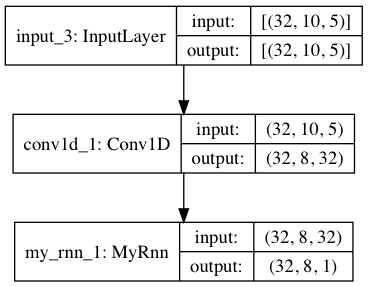

In [4]:
# 超参
time_step = 10
batch_size = 32
hidden_dim = 32
inputs_dim = 5

# 网络
class MyRnn(layers.Layer):
    def __init__(self):
        super(MyRnn,self).__init__()
        self.hidden_dim=hidden_dim
        self.projecyion1= layers.Dense(units=hidden_dim,activation='tanh')
        self.projecyion2= layers.Dense(units=hidden_dim,activation='tanh')
        self.classifier=layers.Dense(1,activation='sigmoid')
    def call(self,inputs):
        outs=[]
        states=tf.zeros(shape=[inputs.shape[0],self.hidden_dim])
        for t in range(inputs.shape[1]):
            x=inputs[:,t,:]
            h=self.projecyion1(x)
            y=h+self.projecyion2(states)
            states=y
            outs.append(y)
        features=tf.stack(outs,axis=1)
        print(features.shape)
        return self.classifier(features)
#构建网络
inputs=keras.Input(batch_shape=(batch_size,time_step,inputs_dim))
x=layers.Conv1D(32,3)(inputs)
print(x.shape)
outputs=MyRnn()(x)
model=keras.Model(inputs,outputs)
model.summary()
keras.utils.plot_model(model,'myRnn.png', show_shapes=True)

In [ ]:
rnn_model = MyRnn()
_ = rnn_model(tf.zeros((1, 10, 5)))


# 7 何时使用函数式API


如何决定是使用函数式API创建新模型，还是Model直接对类进行子类化？

通常，函数式API是更高级别的，更易于使用和更安全的构建方法，并且具有许多子类化模型不支持的功能。

但是，在创建不容易表示为有向无环图的层的模型时，模型子类化为您提供了更大的灵活性（例如，您无法使用Functional API实现Tree-RNN，您必须Model直接子类化）。

功能性API的优点如下：

下面列出的属性对于顺序模型（也是数据结构）也都是正确的，但对于子类模型（它们是Python字节码，不是数据结构）则不是正确的。

+ 它不那么冗长。不需要__init__函数和call函数。
+ 在定义模型时，它将验证模型。
   ++ 在Functional API中，输入规范（shape和dtype）是预先创建的（通过Input），并且每次调用图层时，该图层都会检查传递给它的规范是否符合其假设。
   ++ 这样可以保证使用Functional API构建的任何模型都可以运行。所有调试（与收敛相关的调试除外）将在模型构建过程中静态发生，而不是在执行时发生。这类似于在编译器中进行类型检查。
   ++ 函数式模型是可绘制且可检查的。
可以将模型绘制为图形，并且可以轻松访问该图形中的中间节点-例如，以提取和重用中间层的输出。
函数式模型模型可以序列化或克隆
因为函数式模型是数据结构而不是一段代码，所以它可以安全地序列化，并且可以保存为单个文件，可以重新创建完全相同的模型，而无需访问任何原始代码。
功能性API的缺点如下：

它不支持动态架构。

Functional API将模型视为层的DAG。对于大多数深度学习架构（但不是全部），这是正确的：但是，递归网络或Tree RNN不遵循此假设，并且无法在Functional API中实现。
有时，需要从头开始编写所有内容。

在编写高级体系结构时，可能想做“定义层的DAG”范围之外的事情：例如，可能需要在模型实例上公开多个自定义训练和推理方法。这需要子类化。


如何决定是使用函数式API创建新模型，还是Model直接对类进行子类化？

通常，函数式API是更高级别的，更易于使用和更安全的构建方法，并且具有许多子类化模型不支持的功能。

但是，在创建不容易表示为有向无环图的层的模型时，模型子类化为您提供了更大的灵活性（例如，您无法使用Functional API实现Tree-RNN，您必须Model直接子类化）。

功能性API的优点如下：

下面列出的属性对于顺序模型（也是数据结构）也都是正确的，但对于子类模型（它们是Python字节码，不是数据结构）则不是正确的。

+ 它不那么冗长。不需要__init__函数和call函数。
+ 在定义模型时，它将验证模型。
   ++ 在Functional API中，输入规范（shape和dtype）是预先创建的（通过Input），并且每次调用图层时，该图层都会检查传递给它的规范是否符合其假设。
   ++ 这样可以保证使用Functional API构建的任何模型都可以运行。所有调试（与收敛相关的调试除外）将在模型构建过程中静态发生，而不是在执行时发生。这类似于在编译器中进行类型检查。
   ++ 函数式模型是可绘制且可检查的。
可以将模型绘制为图形，并且可以轻松访问该图形中的中间节点-例如，以提取和重用中间层的输出。
函数式模型模型可以序列化或克隆
因为函数式模型是数据结构而不是一段代码，所以它可以安全地序列化，并且可以保存为单个文件，可以重新创建完全相同的模型，而无需访问任何原始代码。
功能性API的缺点如下：

它不支持动态架构。

Functional API将模型视为层的DAG。对于大多数深度学习架构（但不是全部），这是正确的：但是，递归网络或Tree RNN不遵循此假设，并且无法在Functional API中实现。
有时，需要从头开始编写所有内容。

在编写高级体系结构时，可能想做“定义层的DAG”范围之外的事情：例如，可能需要在模型实例上公开多个自定义训练和推理方法。这需要子类化。
